# Activation function

\begin{align*}
Binary \space Step \space Function (x) = 
\begin{cases}
1 \quad if \quad \sum_{i=1}^{m} w_i x_i + b \ge threshold \\
0 \quad if \quad \sum_{i=1}^{m} w_i x_i + b \lt threshold \\
\end{cases}
\end{align*}

\begin{align*}
ReLU (x) = 
\begin{cases}
0 \quad if \quad x \lt 0 \\
1 \quad if \quad x \ge  x
\end{cases}
\end{align*}

\begin{align*}
Sigmoid (x) = 

\frac{1}{1 + e^{-x}} \in [0, 1]

\end{align*}

\begin{align*}
Tanh (x) = 

\frac{ e^{x} - e^{-x}  }{ e^{x} + e^{-x}} \in [0, 1]

\end{align*}

# Derivative / Gradient

## Derivative

$$
f'(x) = lim_{\triangle x \rightarrow 0} \frac { f(x+\triangle) - f(x) } {\triangle x} \\ 
y' = lim_{\triangle x \rightarrow 0} \frac { \triangle y } {\triangle x} \\
\frac {dy} {dx} = lim_{\triangle x \rightarrow 0} \frac { \triangle y } {\triangle x}
$$

## Gradient

$$
\nabla f = [ \frac{\partial f}{\partial x} , \frac{\partial f}{\partial y} , \frac{\partial f}{\partial z} ]  \\ 
\nabla f = [ \frac{\partial f}{\partial x}i + \frac{\partial f}{\partial y}j + \frac{\partial f}{\partial z}k ]
$$

## Direction of increase of function

$$
D_{\vec{b}}f = \nabla f.\vec{b} = \|  \nabla f \| \| b \| \cos{\theta}
$$

## Gradient Decent

$$
\vec{x_0} = (x_0, y_0) \\
\vec{x_{n+1}} = \vec{x_n} - \eta \nabla f \vec{x_n}
$$

$w_{j, i}$ là trọng số kết nối từ ngõ vào neural thứ i đến neural thứ j ở lớp sau nó
$$
a_j = \sum_{i=1}^{n}x_i w_{j,i} + b_j \\
o_j = \sigma (a_j) = \frac{1}{1 + e^{-a_j}} \\
$$

# Cost function 

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - (ax_i+b)^2) \\
$$

# Update

$$
J = Costfunction() \\
w = w - \eta\frac{\partial J}{\partial w}
$$

# Train new neural network with gradient descent

$$
a_j = \sum_{i=1}^{20}x_i w_{j, i} + b_j \\
o_j = \sigma(a_j)=\frac{1}{1+e^{-a_j}}  \\
J = \frac{1}{5} \sum_{t=1}^{5} \sum_{k=1}^{5} (y_k^t - o_k^t)^2 \space trong \ đó \ k: \ là \ số \ ngõ \ ra, \ t \ là \ số \ mẫu \
$$

In [1]:
import numpy as np  
import matplotlib.pyplot as plt 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Character matrix and target labels
char = np.matrix([
    [0, 0, 1, 0,
     0, 1, 1, 0,
     0, 0, 1, 0,
     0, 0, 1, 0,
     1, 1, 1, 1], 
    [1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1,
     1, 0, 0, 0,
     1, 1, 1, 1],
    [1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1],
    [1, 0, 0, 1,
     1, 0, 0, 1,
     1, 1, 1, 1,
     0, 0, 0, 1,
     0, 0, 0, 1],
    [1, 1, 1, 1,
     1, 0, 0, 0,
     1, 1, 1, 1,
     0, 0, 0, 1,
     1, 1, 1, 1]
], dtype=np.int8)

target = np.matrix([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
])


In [3]:

# Function for sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

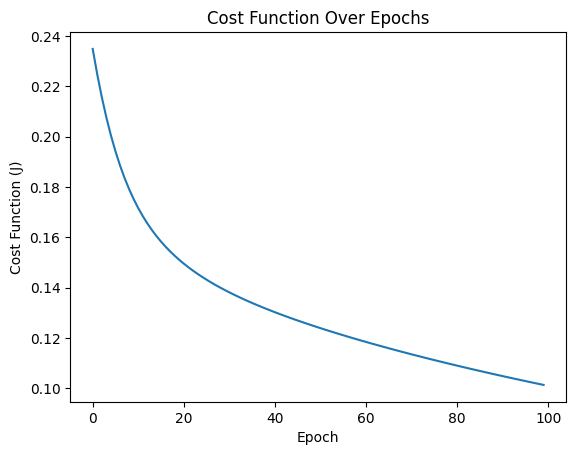

In [4]:

# Hyperparameters
alpha = 0.1  # Learning rate
epochs = 100  # Number of epochs

# Weight initialization
w = np.matrix(np.random.uniform(-0.1, 0.1, (5, 20)))

# To track cost function (J) values over epochs
J = np.zeros(epochs)

for epoch in range(epochs):
    dJ_dw = np.zeros_like(w)  # Initialize gradient to zero for each epoch
    total_cost = 0  # Initialize total cost for each epoch
    
    for sample in range(5):  # Loop over all samples
        X = char[sample, :]  # Input character sample
        y = target[sample, :]  # Corresponding target
        
        # Forward pass
        y_pred = sigmoid(np.dot(X, w.T))  # Predicted output
        
        # Compute error and gradients
        error = y - y_pred
        delta = np.multiply(np.multiply(error, y_pred), (1 - y_pred))  # Derivative of sigmoid
        dJ_dw += delta.T * X  # Accumulate gradients
        
        # Cost (Mean Squared Error for this sample)
        total_cost += np.mean(np.power(error, 2))
    
    # Update weights after processing all samples
    w += alpha * dJ_dw / 5  # Gradient step, averaged over the samples
    
    # Store the cost for this epoch
    J[epoch] = total_cost / 5

# Plot the cost function over epochs
plt.plot(J)
plt.ylabel('Cost Function (J)')
plt.xlabel('Epoch')
plt.title('Cost Function Over Epochs')
plt.show()


# Backpropagation and gradient descent

In [15]:
import numpy as np 

data_path = r'C:\\Users\\hongquan\\Documents\\GitHub\\ANN\\Dataset_MNIST\\'


train_data = np.loadtxt(data_path + 'mnist_train.csv', delimiter= ',')
test_data = np.loadtxt(data_path + 'mnist_test.csv', delimiter= ',')


In [17]:
train_data.shape

(60000, 785)

In [19]:
X_train = train_data[:, 1:]
X_test = test_data[:, 1:]

y_train = train_data[:, 0]
y_test = test_data[:, 0]